# EDA for Liver Disease Data

In [1]:
# Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rn
import warnings
warnings.filterwarnings('ignore')

### Reading and displaying the file

In [2]:
file = pd.read_csv('indian liver Patient.csv')
file

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Looking at the datatypes

In [3]:
file.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
is_patient                      int64
dtype: object

### Checking the column names

In [4]:
# getting a list of the column names
file.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'is_patient '],
      dtype='object')

#### The column name 'is_patient ' has a space at the end. We change it to 'is_patient' for convenience.

In [5]:
# Changing the column name
file.rename(columns = {'is_patient ':'is_patient'}, inplace = True)

### Dealing with null values

In [6]:
# Number of null values in each column
file.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
is_patient                    0
dtype: int64

#### There are 4 null values in the 'Albumin_and_Globulin_Ratio' column.
As it is a small number, we can remove those rows.

In [7]:
# Removing the rows with null values
file = file[file['Albumin_and_Globulin_Ratio'].notnull()]

In [8]:
# Confirming that the data has been cleaned of null values
file.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
is_patient                    0
dtype: int64

#### There are no more null values.

### Dealing with outliers

#### General overview of the stats for each column:

In [9]:
file.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### - The values in the 'Age' column seem to be making sense.

In [10]:
# Checking the Total Bilirubin values
len(file[file['Total_Bilirubin']>40])

2

#### - The maximum value in the 'Total_Bilirubin' column seems too large, but it could be possible to have those levels when the condition is very severe. But as there are only 2 values above 40, such large values are only found in extreme cases, we will remove them from the data.

In [11]:
# Removing outliers
file = file[file['Total_Bilirubin']<=40]

#### - The value of 19.7 is much larger than 1.3 for the Direct Bilirubin values. Direct Bilirubin values are generally a third of Total Bilirubin values, so we remove the outliers according to that.

In [12]:
# Checking Direct Bilirubin values
len(file[file['Direct_Bilirubin']>(40/3)])

5

In [13]:
# Removing outliers
file = file[file['Direct_Bilirubin']<=(40/3)]

#### - The value of 2110 is much larger than 298 for Alkaline Phosphotase.

In [14]:
# Checking Alkaline Phosphotase values
len(file[file['Alkaline_Phosphotase']>1500])

7

Extremely high levels of Alkaline Phosphotase are only possible when the person has liver disease, so we remove all the rows where the value is high but it is not a patient.

In [15]:
# Removing outliers
a = file[file['Alkaline_Phosphotase']<=1500]
b = file[file['Alkaline_Phosphotase']>1500]
c = b[b['is_patient']==1]
file = pd.concat([c, a], ignore_index=True)
len(file[file['Alkaline_Phosphotase']>1500])

6

#### - The value of 2000 is much larger than 61 for Alamine_Aminotransferase, but this is possible in people with liver disease.

In [16]:
# Checking Alamine Aminotransferase values
(file[file['Alamine_Aminotransferase']>1500])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
33,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
53,40,Male,1.1,0.3,230,1630,960,4.9,2.8,1.3,1
120,32,Male,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1


As they are all patients, we do not remove any outliers.

#### - The value of 4929 is extremely large for Aspartate Aminotransferase.

In [17]:
# Checking Aspartate Aminotransferase values
file[file['Aspartate_Aminotransferase']>1500]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
120,32,Male,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1
121,32,Male,15.9,7.0,280,1350,1600,5.6,2.8,1.0,1
137,66,Male,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1


In [18]:
# Removing outliers
file = file[file['Aspartate_Aminotransferase']<=1500]

#### -The Total_Protiens values seem to be making sense.

#### -The Albumin values seem to be making sense.

#### -The Albumin_and_Globulin_Ratio values seem to be making sense.

In [19]:
file.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_patient
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,44.876761,2.826056,1.306338,287.408451,73.625000,94.135563,6.484155,3.148239,0.947623,1.288732
std,16.281874,4.541868,2.360797,236.988927,149.653045,162.122412,1.086503,0.797680,0.312894,0.453573
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,207.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.400000,1.200000,298.000000,60.000000,85.250000,7.200000,3.800000,1.100000,2.000000
max,90.000000,27.700000,12.800000,2110.000000,1680.000000,1500.000000,9.600000,5.500000,2.800000,2.000000


#### Checking the 'is_patient' column:

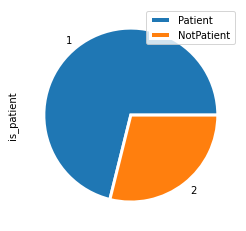

In [20]:
# Checking if the data in the 'is_patient' column only comprises of 1 and 2, and showing the proportion of patients
file['is_patient'].value_counts(normalize=True).plot.pie(wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.legend(['Patient','NotPatient'])
plt.show()

### General heatmap with the correlation between the different biomarkers

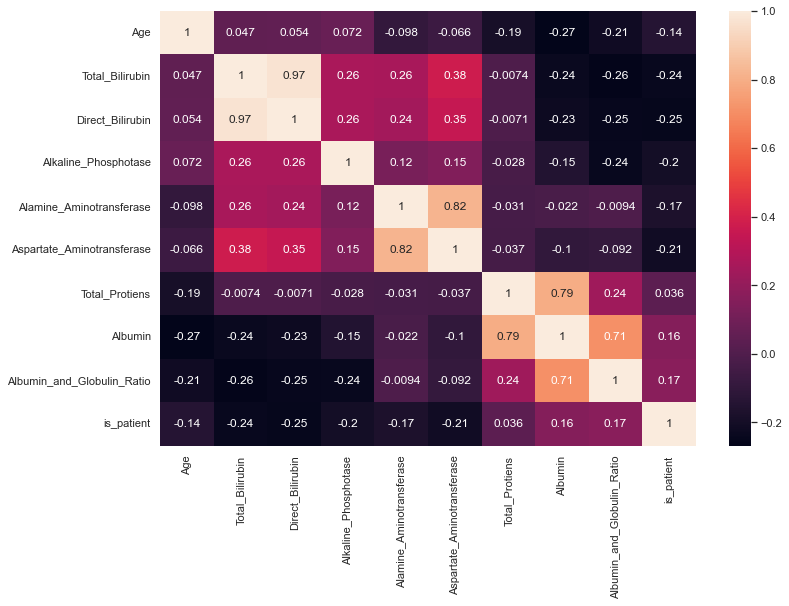

In [21]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(file.corr(), annot=True, cmap = 'rocket')
plt.show()

## The relation between gender and the likelihood of liver disease

### Getting the ratio of patients to non-patients for each gender

In [22]:
print('The ratio of female patients to total females is',len(file[file['Gender']=='Female'][file['is_patient']==1])/len(file[file['Gender']=='Female']))
print('The ratio of male patients to total males is',len(file[file['Gender']=='Male'][file['is_patient']==1])/len(file[file['Gender']=='Male']))

The ratio of female patients to total females is 0.65
The ratio of male patients to total males is 0.7313084112149533


### Plotting the ratio of patients to non-patients for each gender

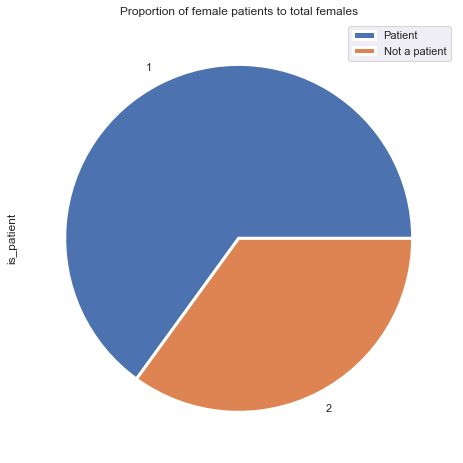

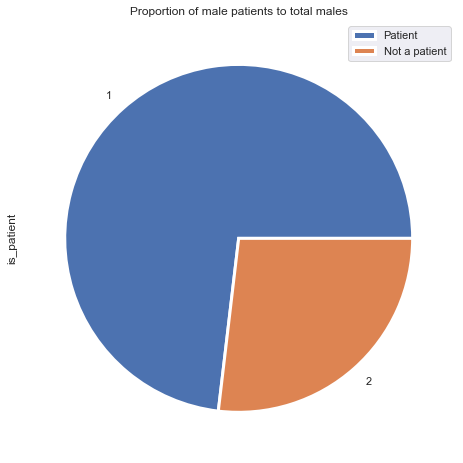

In [23]:
file[file['Gender']=='Female']['is_patient'].value_counts(normalize=True).plot.pie(wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.legend(['Patient','Not a patient'])
plt.title('Proportion of female patients to total females')
plt.show()

file[file['Gender']=='Male']['is_patient'].value_counts(normalize=True).plot.pie(wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.legend(['Patient','Not a patient'])
plt.title('Proportion of male patients to total males')
plt.show()

#### Males are more likely to get the disease.

## Effect of age on liver disease

### Showing the proportion of patients in different age brackets

In [24]:
f2 = pd.DataFrame()
f2['AgeBracket'] = [str(i*10)+'-'+str((i+1)*10) for i in range(9)]
f2['Diseasedproportion']=[ len(file[file['Age']>(i*10)][file['Age']<=(i+1)*10][file['is_patient']==1])  / len(file[file['Age']>(i*10)][file['Age']<=(i+1)*10]) for i in range(9)]
f2['CountsofPatients'] = [len(file[file['Age']>(i*10)][file['Age']<=(i+1)*10]) for i in range(9)]
f2

,AgeBracket,Diseasedproportion,CountsofPatients
0,0-10,0.428571,7
1,10-20,0.588235,34
2,20-30,0.555556,72
3,30-40,0.733333,120
4,40-50,0.748092,131
5,50-60,0.792453,106
6,60-70,0.636364,66
7,70-80,0.965517,29
8,80-90,0.333333,3


### Plotting the proportion of patients in different age brackets

<BarContainer object of 9 artists>

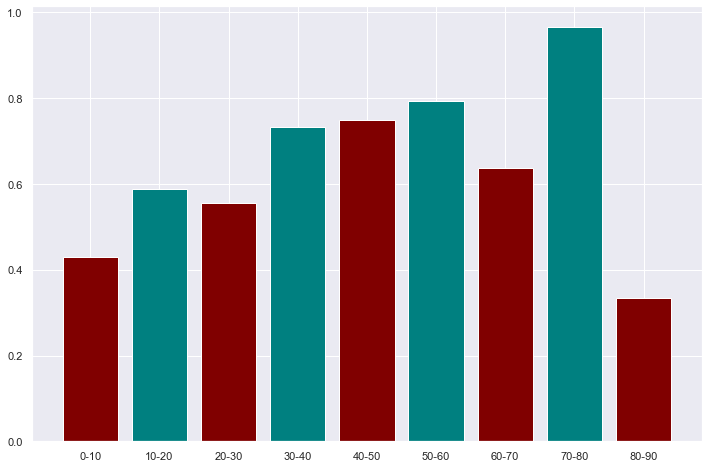

In [25]:
plt.bar(f2['AgeBracket'],f2['Diseasedproportion'],color=['maroon','teal'])

### Conclusion

#### There is a general increase in the proportion of patients with an increase in age, but the proportion of patients in the age bracket of 60-70 is lower than that in the bracket 50-60. After the age of 80, there is a sudden decrease in the proportion. This could be because the data for people aged above 80 is very small, so it might not be a very good representation of the population. It could also be that people who live to be that old, beating the life expectancy, could only do so because they already had healthy bodies, and so the proportion of patients is small in that bracket. 

## Relationship between each biomarker and the likelihood of liver disease

In [26]:
sns.set(rc = {'figure.figsize':(12,8)})
def therel(biomarker):
    sns.histplot(data=file,x=biomarker, hue='is_patient', log_scale=True)
    plt.show()

### Total Bilirubin

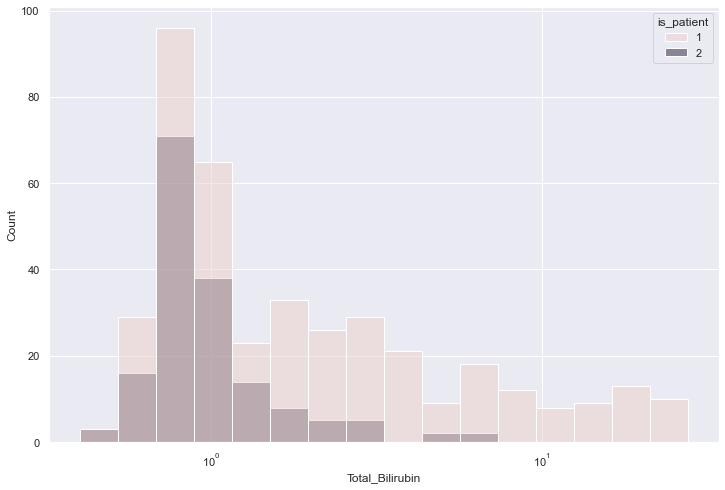

In [27]:
therel('Total_Bilirubin')

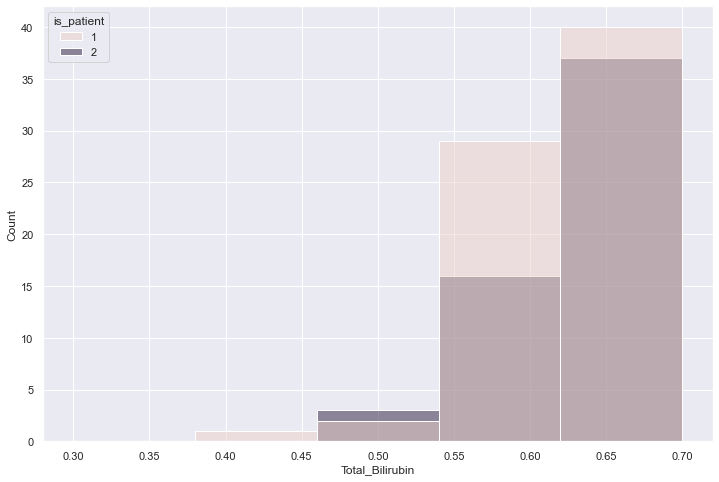

In [28]:
sns.histplot(data=file,x='Total_Bilirubin', hue='is_patient',bins=5,binrange = (0.3,0.7))
plt.show()

Generally, after a value of 0.5, the proportion of patients keeps increasing with the Total bilirubin levels.

### Direct Bilirubin

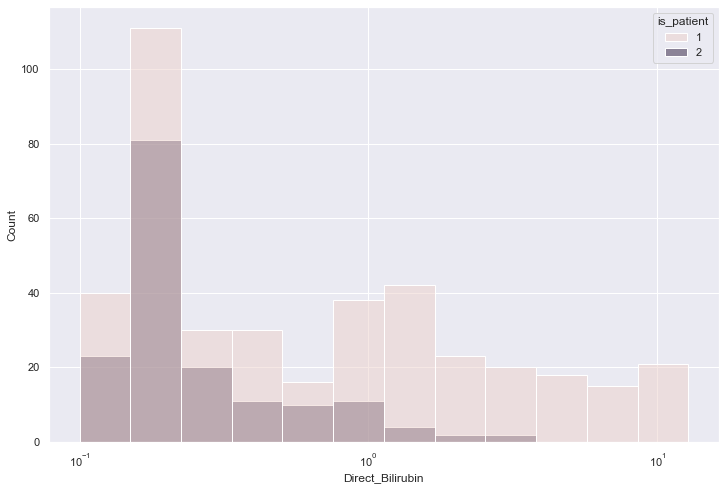

In [29]:
therel('Direct_Bilirubin')

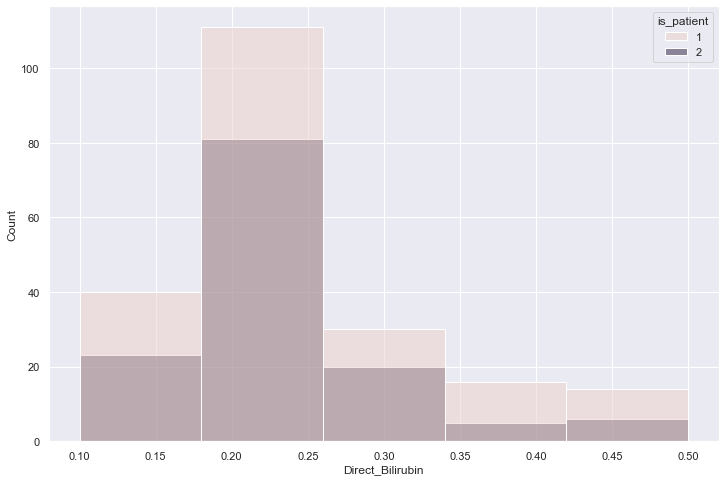

In [30]:
sns.histplot(data=file,x='Direct_Bilirubin', hue='is_patient',bins=5,binrange = (0.1,0.5))
plt.show()

Generally, the proportion of patients seems to be increasing with increased values of Direct Bilirubin, but there isn't a specific point after which the proportion is higher. The proportion of patients is higher even for the lowest values of Direct Bilirubin.

### Alkaline Phosphotase

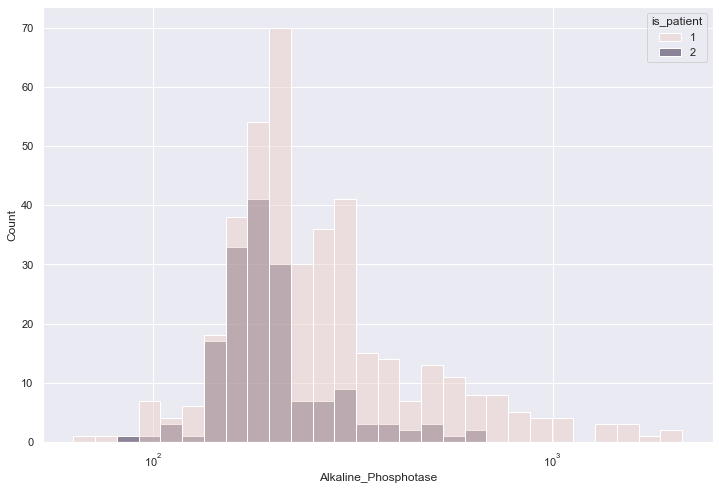

In [31]:
therel('Alkaline_Phosphotase')

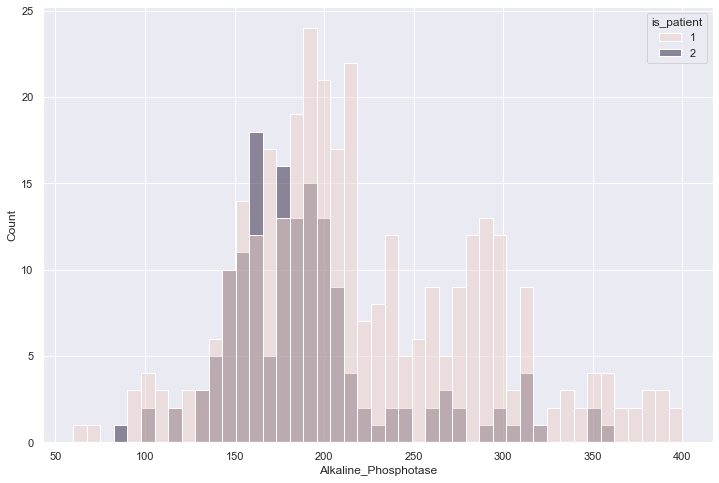

In [32]:
sns.histplot(data=file,x='Alkaline_Phosphotase', hue='is_patient',bins=45,binrange = (60,400))
plt.show()

Generally, after a value of 180, the proportion of patients keeps increasing with the Alkaline Phosphotase levels.

### Alamine Aminotransferase

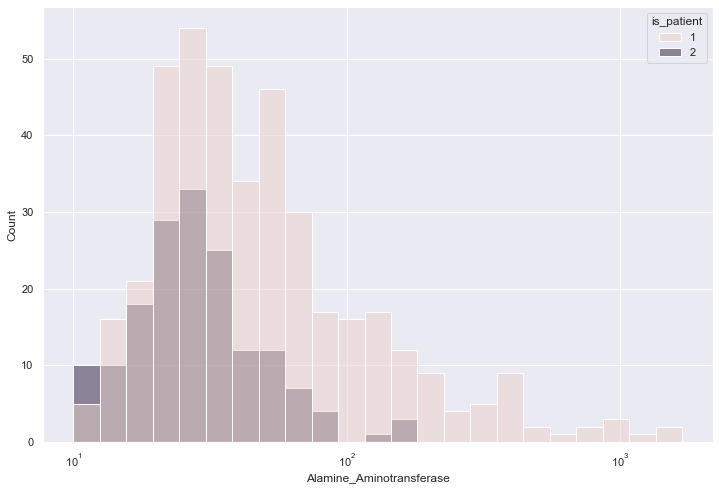

In [33]:
therel('Alamine_Aminotransferase')

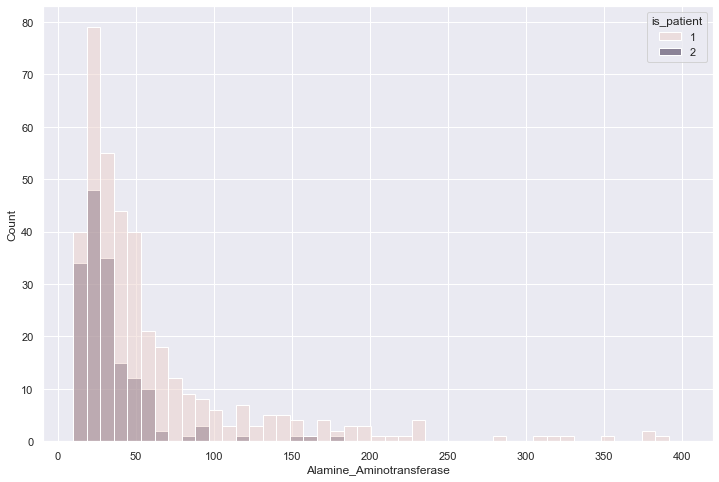

In [34]:
sns.histplot(data=file,x='Alamine_Aminotransferase', hue='is_patient',bins=45,binrange = (10,400))
plt.show()

Generally, the proportion of patients seems to be increasing with increased values of Alamine Aminotransferase, but there isn't a specific point after which the proportion is higher. The proportion of patients is higher even for the lowest values.

### Aspartate Aminotransferase

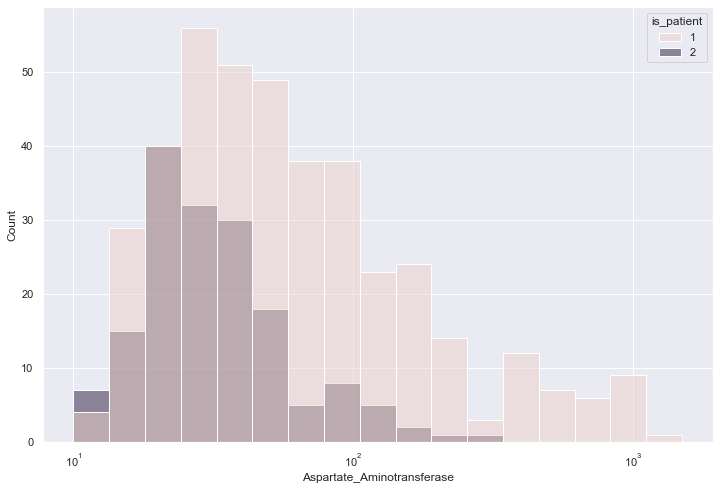

In [35]:
therel('Aspartate_Aminotransferase')

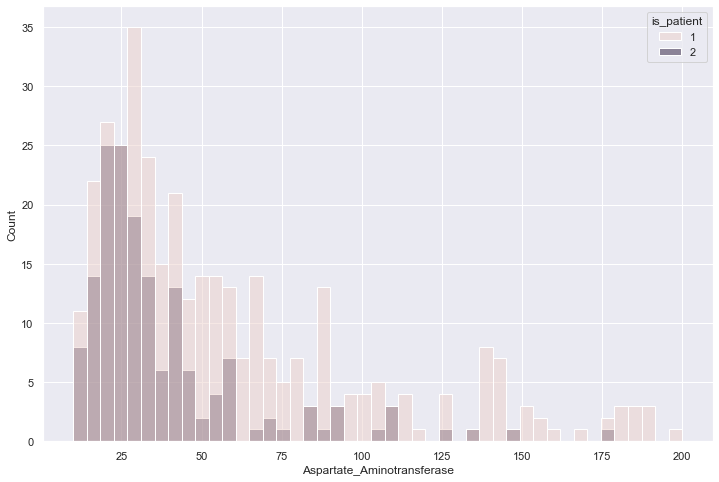

In [36]:
sns.histplot(data=file,x='Aspartate_Aminotransferase', hue='is_patient',bins=45,binrange = (10,200))
plt.show()

Generally, the proportion of patients seems to be increasing with increased values of Aspartate Aminotransferase, but there isn't a specific point after which the proportion is higher. The proportion of patients is higher even for the lowest values.

### Total Protiens

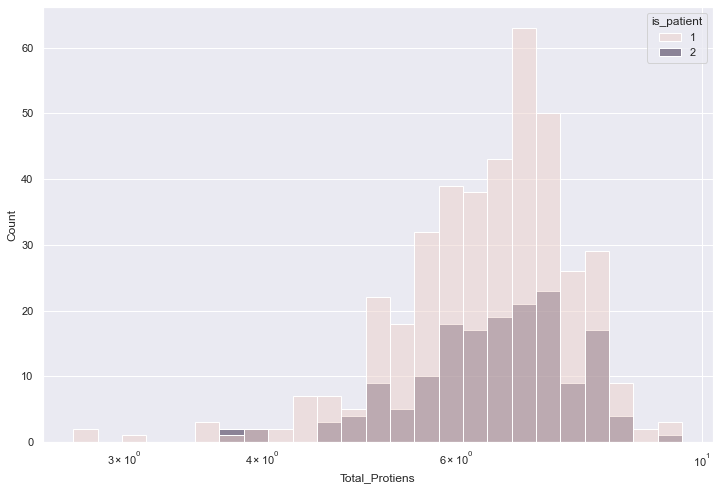

In [37]:
therel('Total_Protiens')

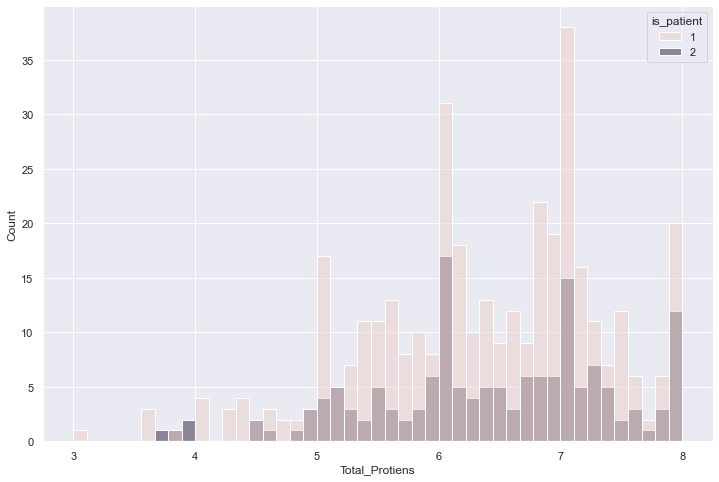

In [38]:
sns.histplot(data=file,x='Total_Protiens', hue='is_patient',bins=45,binrange = (3,8))
plt.show()

Generally, after a value of 4, the proportion of patients keeps increasing with the Total Protien levels.

### Albumin

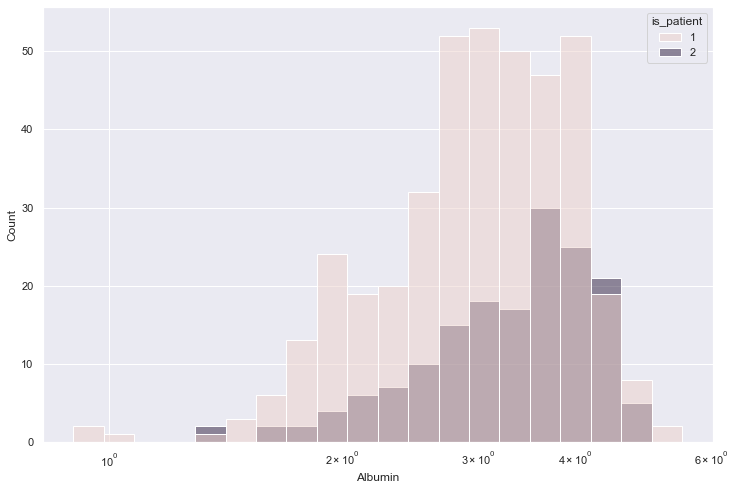

In [39]:
therel('Albumin')

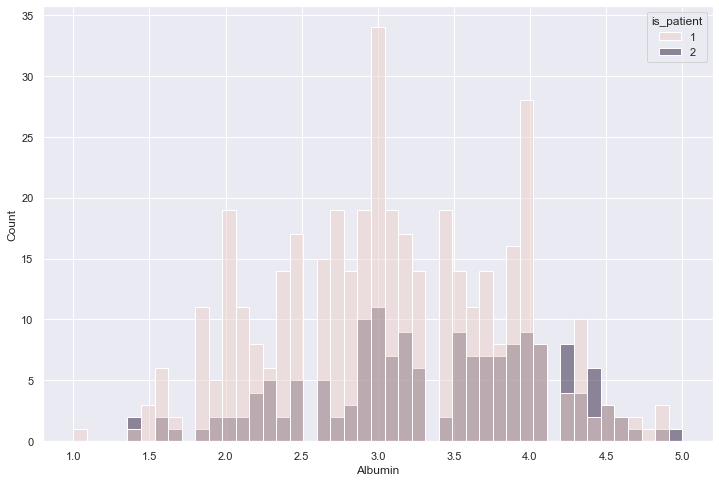

In [40]:
sns.histplot(data=file,x='Albumin', hue='is_patient',bins=45,binrange = (1,5))
plt.show()

Generally, the proportion of patients is higher, except for a few cases where the value is around 0.4 and around 4.5, but it does not represent a large number of people. So no specific conclusions can be made around those points.

### Albumin and Globulin Ratio

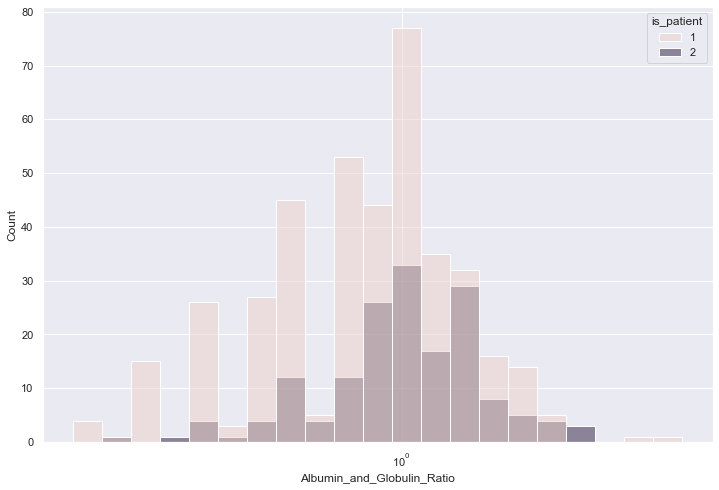

In [41]:
therel('Albumin_and_Globulin_Ratio')

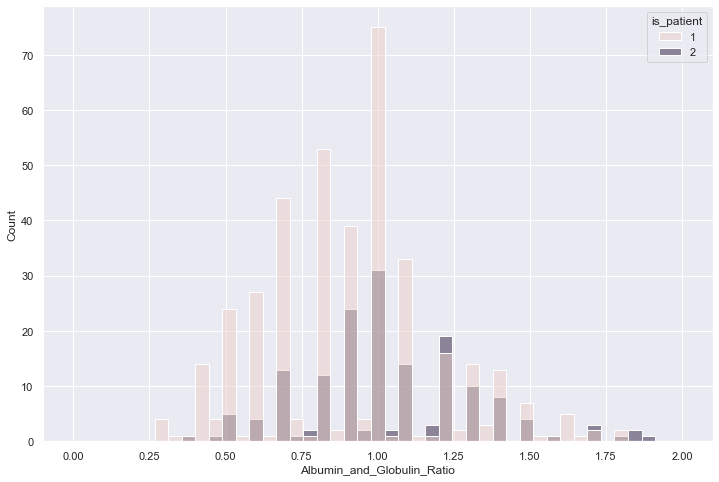

In [42]:
sns.histplot(data=file,x='Albumin_and_Globulin_Ratio', hue='is_patient',bins=45,binrange = (0,2))
plt.show()

There is no noticeable trend here, except that for the majority of values, the proportion of patients is higher.